<a href="https://colab.research.google.com/github/nafiul-araf/RFM-Segmentation/blob/main/Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
url = 'https://raw.githubusercontent.com/nafiul-araf/RFM-Segmentation/refs/heads/main/Data%20and%20Output/RFM%20Segmentation%20Output.csv'

df = pd.read_csv(url)
df

,customer_name,frequency,monetary_value,last_order_date,final_date,city,country,recency,recency_score,frequency_score,monetary_score,rfm_score,segment
0,Boards & Toys Co.,2,9129.35,2005-02-08,2005-05-31,Glendale,USA,113,3,2,1,321,Other
1,Atelier graphique,3,24179.96,2004-11-25,2005-05-31,Nantes,France,188,2,2,1,221,Other
2,Auto-Moto Classics Inc.,3,26479.26,2004-12-03,2005-05-31,Brickhaven,USA,180,3,3,1,331,Other
3,Microscale Inc.,2,33144.93,2004-11-03,2005-05-31,NYC,USA,210,2,1,1,211,Other
4,Royale Belge,4,33440.10,2005-01-10,2005-05-31,Charleroi,Belgium,142,3,4,1,341,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,La Rochelle Gifts,4,180124.90,2005-05-31,2005-05-31,Nantes,France,1,4,4,4,444,Loyal Customers
88,Muscle Machine Inc,4,197736.94,2004-12-01,2005-05-31,NYC,USA,182,3,4,4,344,Other
89,"Australian Collectors, Co.",5,200995.41,2004-11-29,2005-05-31,Melbourne,Australia,184,3,4,4,344,Other
90,Mini Gifts Distributors Ltd.,17,654858.06,2005-05-29,2005-05-31,San Rafael,USA,3,4,4,4,444,Loyal Customers


In [3]:
df = df.rename(columns={'recency': 'retency'})
df

,customer_name,frequency,monetary_value,last_order_date,final_date,city,country,retency,recency_score,frequency_score,monetary_score,rfm_score,segment
0,Boards & Toys Co.,2,9129.35,2005-02-08,2005-05-31,Glendale,USA,113,3,2,1,321,Other
1,Atelier graphique,3,24179.96,2004-11-25,2005-05-31,Nantes,France,188,2,2,1,221,Other
2,Auto-Moto Classics Inc.,3,26479.26,2004-12-03,2005-05-31,Brickhaven,USA,180,3,3,1,331,Other
3,Microscale Inc.,2,33144.93,2004-11-03,2005-05-31,NYC,USA,210,2,1,1,211,Other
4,Royale Belge,4,33440.10,2005-01-10,2005-05-31,Charleroi,Belgium,142,3,4,1,341,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,La Rochelle Gifts,4,180124.90,2005-05-31,2005-05-31,Nantes,France,1,4,4,4,444,Loyal Customers
88,Muscle Machine Inc,4,197736.94,2004-12-01,2005-05-31,NYC,USA,182,3,4,4,344,Other
89,"Australian Collectors, Co.",5,200995.41,2004-11-29,2005-05-31,Melbourne,Australia,184,3,4,4,344,Other
90,Mini Gifts Distributors Ltd.,17,654858.06,2005-05-29,2005-05-31,San Rafael,USA,3,4,4,4,444,Loyal Customers


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_name    92 non-null     object 
 1   frequency        92 non-null     int64  
 2   monetary_value   92 non-null     float64
 3   last_order_date  92 non-null     object 
 4   final_date       92 non-null     object 
 5   city             92 non-null     object 
 6   country          92 non-null     object 
 7   retency          92 non-null     int64  
 8   recency_score    92 non-null     int64  
 9   frequency_score  92 non-null     int64  
 10  monetary_score   92 non-null     int64  
 11  rfm_score        92 non-null     int64  
 12  segment          92 non-null     object 
dtypes: float64(1), int64(6), object(6)
memory usage: 9.5+ KB


In [5]:
df_pca=df.copy()

In [6]:
scaler = StandardScaler()
df_pca[['retency', 'frequency', 'monetary_value']] = scaler.fit_transform(df_pca[['retency', 'frequency', 'monetary_value']])

In [7]:
# Perform PCA with 3 components
pca = PCA(n_components=3)
pca_components = pca.fit_transform(df_pca[['retency', 'frequency', 'monetary_value']])
df_pca[['pca1', 'pca2', 'pca3']] = pca_components

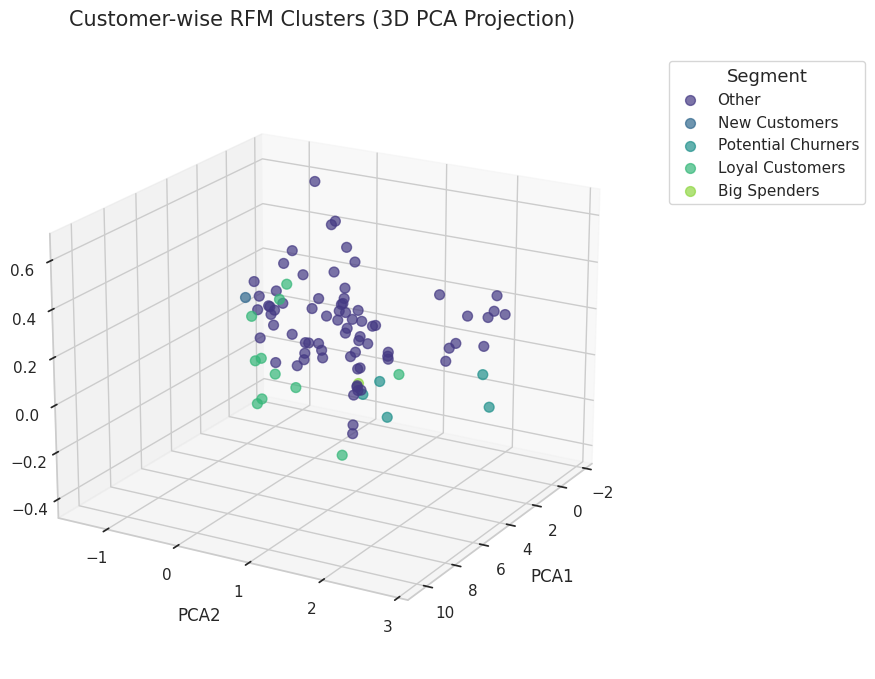

In [8]:
# Set Seaborn style for better aesthetics
sns.set(style="whitegrid", palette="muted")

# Create a 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Define colors for each segment
unique_segments = df_pca['segment'].unique()
segment_colors = {segment: color for segment, color in zip(unique_segments, sns.color_palette("viridis", len(unique_segments)))}

# Plot each segment separately for clarity
for segment in unique_segments:
    subset = df_pca[df_pca['segment'] == segment]
    ax.scatter(subset['pca1'], subset['pca2'], subset['pca3'],
               label=segment, color=segment_colors[segment], s=50, alpha=0.7)

# Set axis labels and title
ax.set_xlabel('PCA1', labelpad=10)
ax.set_ylabel('PCA2', labelpad=10)
ax.set_zlabel('PCA3', labelpad=10)
ax.set_title('Customer-wise RFM Clusters (3D PCA Projection)', fontsize=15, pad=20)

# Add a legend with more space
ax.legend(title='Segment', loc='upper left', bbox_to_anchor=(1.05, 1), title_fontsize='13', fontsize='11')

# Adjust viewing angle for better visibility
ax.view_init(elev=20, azim=30)

plt.show()

In [9]:
# Aggregating data by segment and rounding to two decimal places
segment_df = df.groupby('segment').agg({
    'retency': 'mean',
    'frequency': 'mean',
    'monetary_value': 'mean',
    'customer_name': 'count'
}).reset_index()
segment_df.rename(columns={'customer_name': 'customer_count'}, inplace=True)
segment_df[['retency', 'frequency', 'monetary_value']] = segment_df[['retency', 'frequency', 'monetary_value']].round(2)

In [10]:
# Bin the customer counts into categories
segment_df['customer_count_bin'] = pd.cut(segment_df['customer_count'], bins=5, labels=False)

# Melt the DataFrame to long format for combined heatmap
melted_df = segment_df.melt(id_vars=['segment', 'customer_count_bin'],
                            value_vars=['retency', 'frequency', 'monetary_value'],
                            var_name='metric',
                            value_name='value')

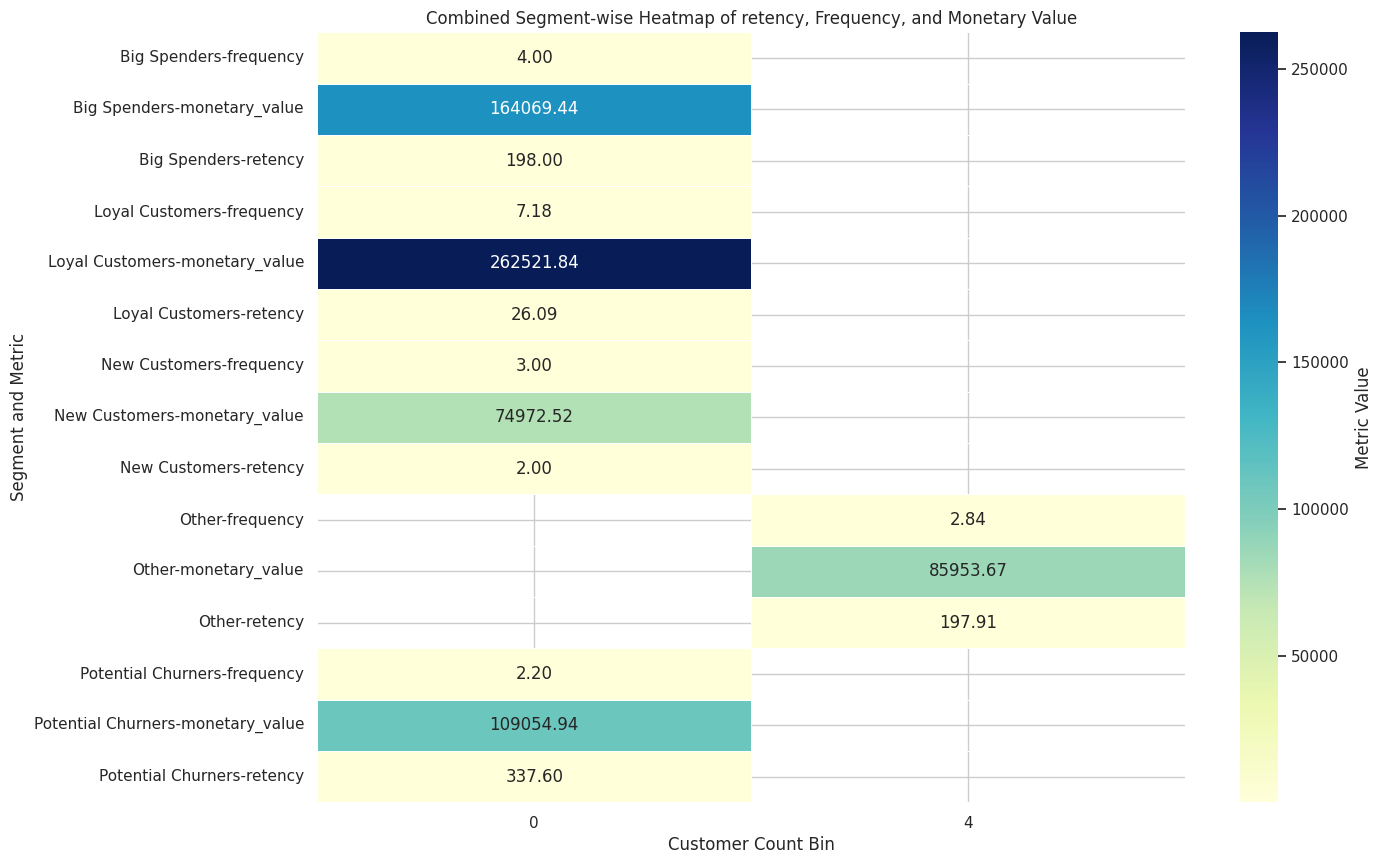

In [11]:
# Pivot the table to have customer count bins as columns, segment and metric as indices
pivot_table = melted_df.pivot_table(index=['segment', 'metric'], columns='customer_count_bin', values='value')

# Plot the combined heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt=".2f", linewidths=0.5, cbar_kws={'label': 'Metric Value'})
plt.title("Combined Segment-wise Heatmap of retency, Frequency, and Monetary Value")
plt.xlabel("Customer Count Bin")
plt.ylabel("Segment and Metric")
plt.show()

## Summary Interpretation of Updated Segment-wise Heatmap

This heatmap highlights key customer segment behaviors in terms of frequency, monetary value, and retency:

- **Loyal Customers** are highly engaged and contribute significantly to revenue.
- **Big Spenders** show high spending with less frequent interactions.
- **New Customers** have recent but lower-value engagement.
- **Potential Churners** display low frequency with high retency, indicating a risk of churn.

The color intensity correlates with monetary value, guiding strategic focus toward retaining high-value segments and re-engaging potential churners.


In [ ]:
# Plotting Customer-wise Clusters in 3D with Plotly
fig = px.scatter_3d(df, x='retency', y='frequency', z='monetary_value', color='segment',
                    title="Customer-wise RFM Clusters (3D)", labels={'retency': 'retency', 'frequency': 'Frequency', 'monetary_value': 'Monetary Value'})
fig.show()

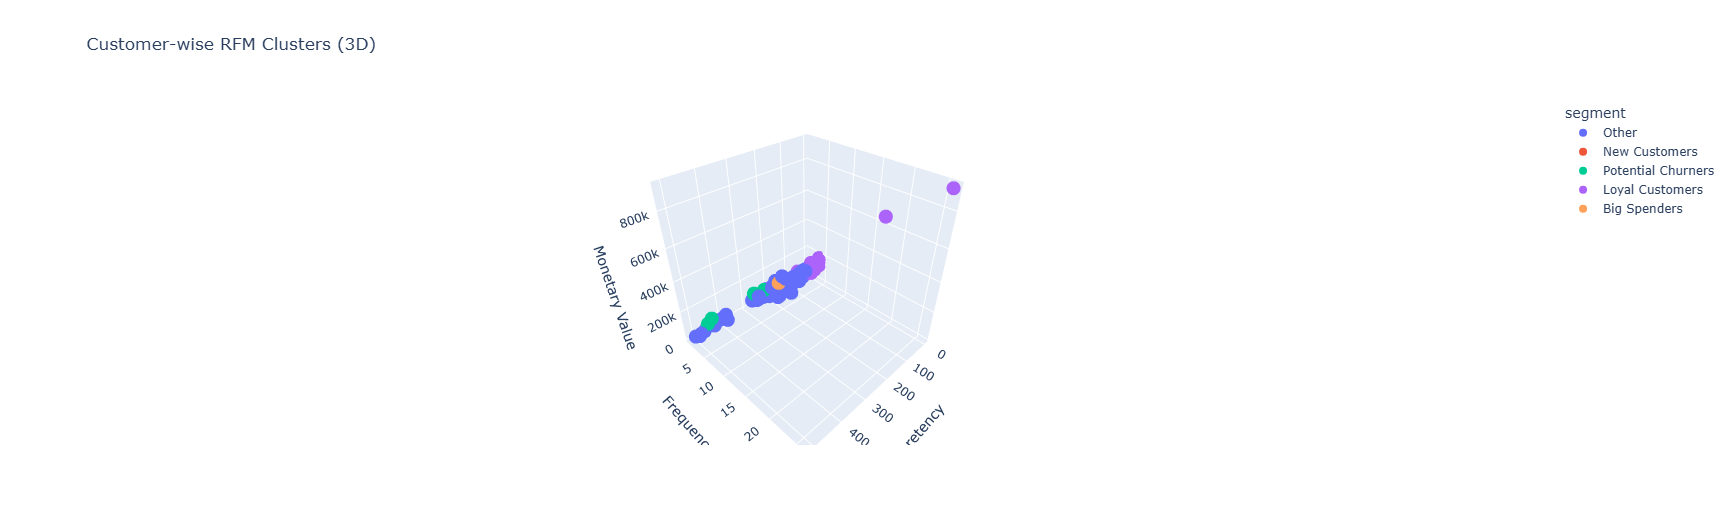

In [13]:
# Calculate aggregate metrics by country (or city)
location_df = df.groupby('country').agg({
    'retency': 'mean',
    'frequency': 'mean',
    'monetary_value': 'mean',
    'customer_name': 'count'
}).reset_index()
location_df.rename(columns={'customer_name': 'customer_count'}, inplace=True)

In [ ]:
# Map 1: Average Monetary Value by Country (Choropleth)
fig = px.choropleth(location_df, locations="country", locationmode='country names',
                    color="monetary_value",
                    hover_name="country",
                    hover_data={"customer_count": ':.2f', "frequency": ':.2f', "retency": ':.2f'},
                    color_continuous_scale="Viridis",
                    title="Average Monetary Value by Country")
fig.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="lightgrey")
fig.show()

In [ ]:
# Map 2: Customer Count and Average retency by City (Scatter Map)
# (If city lat/lon are known or if you use country level data instead)
fig = px.scatter_geo(location_df, locations="country", locationmode='country names',
                     size="customer_count", color="retency",
                     hover_name="country",
                     hover_data={"monetary_value": ':.2f', "frequency": ':.2f'},
                     title="Customer Count and Average retency by Country",
                     color_continuous_scale="OrRd", size_max=30)
fig.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="lightgrey")
fig.show()

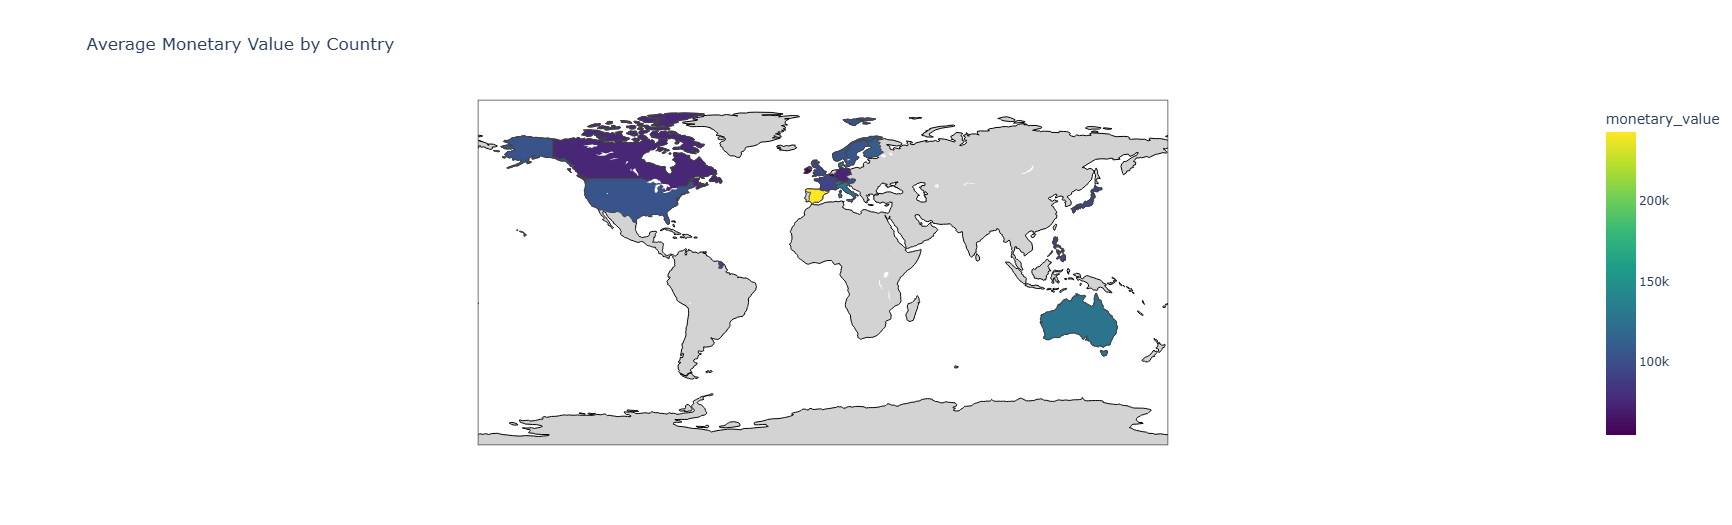

In [ ]:
# Map 3: Combined Map with retency, Monetary Value, and Frequency by Country
fig = px.scatter_geo(location_df, locations="country", locationmode="country names",
                     size="frequency", color="monetary_value",
                     hover_name="country",
                     hover_data={
                         "monetary_value": ':.2f',
                         "frequency": ':.2f',
                         "retency": ':.2f'
                     },
                     title="Combined Map: retency, Monetary Value, and Frequency by Country",
                     color_continuous_scale="Plasma", size_max=30)

# Customize the map appearance
fig.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="lightgrey")
fig.update_layout(
    coloraxis_colorbar=dict(title="Monetary Value"),
    geo=dict(
        projection_type="natural earth"
    )
)

fig.show()

In [20]:
# Calculate aggregate metrics by country (or city)
location_df = df.groupby(['country', 'segment']).agg({
    'retency': 'mean',
    'frequency': 'mean',
    'monetary_value': 'mean',
    'customer_name': 'count'
}).reset_index()
location_df.rename(columns={'customer_name': 'customer_count'}, inplace=True)

In [21]:
location_df

,country,segment,retency,frequency,monetary_value,customer_count
0,Australia,Loyal Customers,3.000000,4.000000,151570.980000,1
1,Australia,Other,102.500000,3.750000,119763.030000,4
2,Austria,Loyal Customers,15.000000,4.000000,149798.630000,1
3,Austria,Other,83.000000,3.000000,52263.900000,1
4,Belgium,New Customers,2.000000,3.000000,74972.520000,1
5,Belgium,Other,142.000000,4.000000,33440.100000,1
6,Canada,Other,179.333333,2.333333,74692.853333,3
7,Denmark,Loyal Customers,47.000000,5.000000,145041.600000,1
8,Denmark,Other,222.000000,2.000000,100595.550000,1
9,Finland,Other,126.333333,3.000000,109860.636667,3


In [ ]:
# Map 4: Map with Segment Information by Country
fig = px.scatter_geo(location_df, locations="country", locationmode="country names",
                     size="frequency", color="segment",  # Color by segment
                     hover_name="country",
                     hover_data={
                         "monetary_value": ':.2f',
                         "frequency": ':.2f',
                         "retency": ':.2f',
                         "segment": True  # Show segment in hover data
                     },
                     title="Map with Segment Information by Country",
                     size_max=30)

# Customize the map appearance
fig.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="lightgrey")
fig.update_layout(
    legend_title_text='Customer Segment',
    geo=dict(projection_type="natural earth")
)

fig.show()

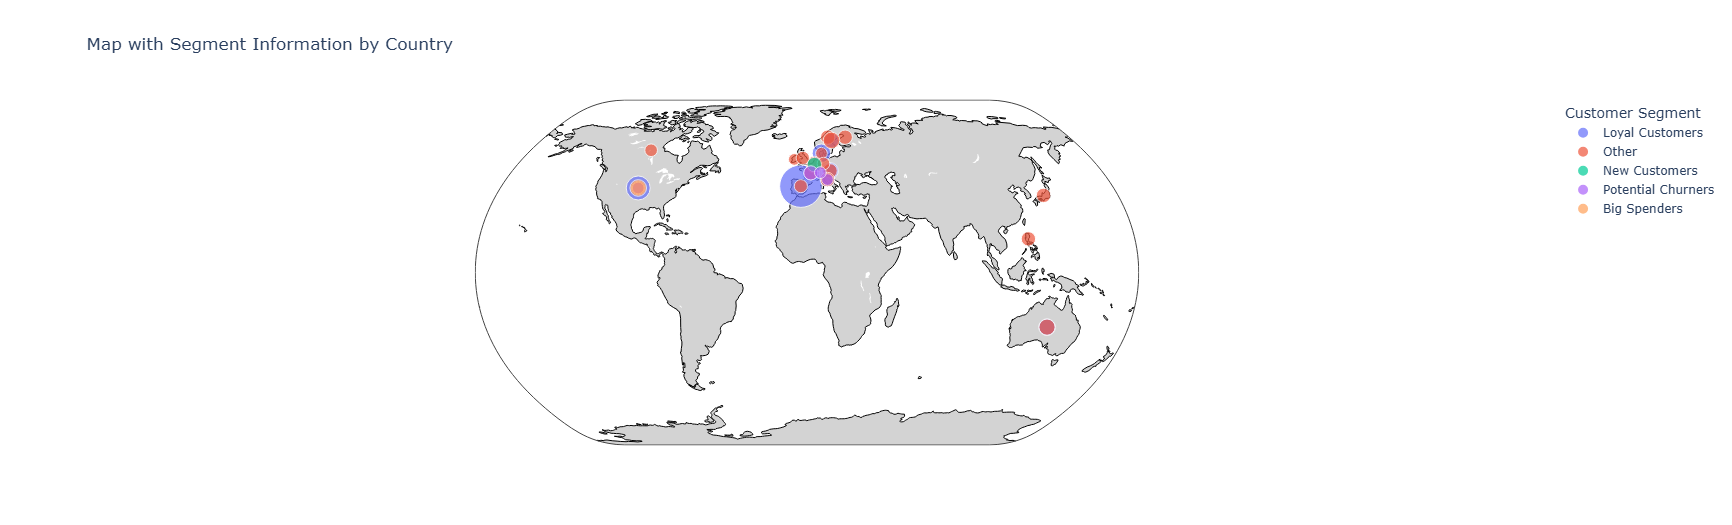

## Summary Interpretation of Country-wise Customer Segments

This data represents customer segments by country, highlighting differences in retency, frequency, and monetary value:

- **Loyal Customers** are present in multiple countries, with Spain showing exceptionally high frequency and monetary value.
- **Big Spenders** (notably in the USA) contribute high monetary value with moderate frequency.
- **New Customers** have lower recency and are primarily located in Belgium, indicating recent engagement.
- **Potential Churners** appear in several countries (e.g., France, Switzerland, USA), showing high recency and lower frequency, signaling possible disengagement risk.
- **Other** segment is present across various countries with moderate to high retency and lower frequency, suggesting occasional but not frequent engagement.

This segmentation helps identify high-value customers and potential churn risks, allowing for targeted strategies by country and segment.